In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
newest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(newest_date.date)

2017-08-23


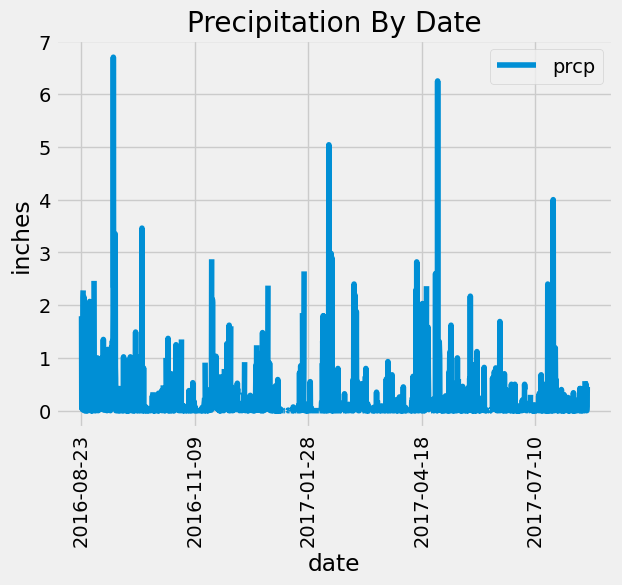

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

one_year_back=dt.date(2017,8,23)-dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >=one_year_back).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df= pd.DataFrame(prcp_scores, columns=['date', 'prcp'])

# Sort the dataframe by date
sorted_prcp_df=prcp_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data

sorted_prcp_df.set_index('date', inplace=True)
sorted_prcp_df.plot()
plt.title("Precipitation By Date")
plt.ylabel("inches")
plt.xticks(rotation=90)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station).count()
print(station_count)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
              group_by(Measurement.station).\
              order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temp = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
station_temps = session.query(*temp).\
    filter(( Measurement.station) == "USC00519281").all()
    
station_temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

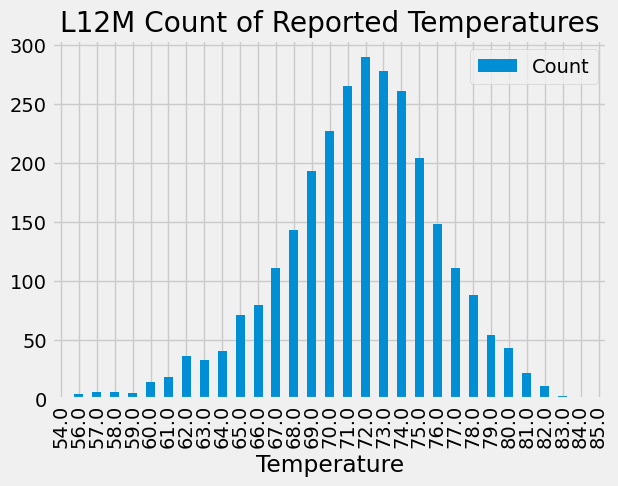

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_freq= session.query(Measurement.tobs,func.count(Measurement.tobs)).\
              filter(( Measurement.station) == "USC00519281").\
              group_by(Measurement.tobs).\
              order_by(Measurement.tobs).all()
df=pd.DataFrame(temp_freq, columns=['Temperature','Count'])        


df.set_index('Temperature', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.title("L12M Count of Reported Temperatures")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()